# Introduction to OMEGA+

Prepared by: Benoit Côté (bcote@uvic.ca)

This notebook introduces the galaxy evolution prescriptions used in <a href="http://adsabs.harvard.edu/abs/2017arXiv171006442C">OMEGA+</a>, and shows how to run a model and analyze the outputs.  In particular, it focuses on gas circulation that directly involves the central galaxy.  The figure and equations found below are taken from <a href="http://adsabs.harvard.edu/abs/2017arXiv171006442C">Côté et al. (2018)</a>

In [1]:
# Import python modules
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# Import the OMEGA+ module
import omega_plus

## 1. General Prescriptions

OMEGA+ is a 2-zone chemical evolution model that include a central galaxy surrounded by a hot gas reservoir representing the circumgalactic medium (CGM).  The central galaxy is a one-zone <a href="http://adsabs.harvard.edu/abs/2017ApJ...835..128C">OMEGA</a> model, which is part of the <a href="https://github.com/NuGrid/NuPyCEE">NuPyCEE</a> package. The central OMEGA model is stored in the *inner* variable of OMEGA+.

- **Circumgalactic inflow**: Accretion of intergalactic gas into the circumgalactic medium.
- **Galactic inflow**: Accretion of circumgalactic gas into the interstellar (galactic) medium.
- **Star formation**: Convertion of galactic gas into stars.
- **Galactic outflow**: Ejection of galactic gas into the circumgalactic medium.
- **Circumgalactic outflow**: Ejection of circumgalactic gas into the intergalactic medium.

<img src="zzz_omega_plus_circulation.png" width="400px" align="center">

The evolution of the galactic gas mass ($M_{\rm gas}$) is defined as,

$$ \dot{M}_{\rm gas} = \dot{M}_{\rm g,in}  + \dot{M}_{\rm ej} - \dot{M}_\star - \dot{M}_{\rm g,out}, $$

where the four terms on the right-hand side are the inflow rate from the CGM into the galaxy ($\dot{M}_{\rm g,in}$), the combined mass-loss rate of all stars ($\dot{M}_{\rm ej}$), the star formation rate ($\dot{M}_\star$), and the outflow rate from the galaxy into the CGM ($\dot{M}_{\rm g,out}$).

The evolution of the circumgalactic medium, the mass of the hot gas reservoir surrounding the central galaxy, is defined by,

$$ \dot{M}_{\rm CGM}= \dot{M}_{\rm CGM,in} + \dot{M}_{\rm g,out} - \dot{M}_\mathrm{g,in} - \dot{M}_{\rm CGM,out}, $$

where $\dot{M}_{\rm CGM,in}$ is the inflow rate from the external medium into the CGM, and $\dot{M}_{\rm CGM,out}$ is the outflow rate from the CGM into the intergalactic medium, a component that is not tracked with OMEGA+.

#### Function used in the following section

In [2]:
# Calculate the total mass of gas in the CGM as a function of time
def get_CGM_mass(inst):
    m_CGM_temp = np.zeros(inst.inner.nb_timesteps+1)
    for i_t in range(inst.inner.nb_timesteps+1):
        m_CGM_temp[i_t] = sum(inst.ymgal_outer[i_t])
    return m_CGM_temp

## 2. Galactic Inflows

In general, the inflow rate is defined by,

$$ \dot{M}_\mathrm{g,in} = \frac{M_\mathrm{gas}}{\tau_\mathrm{in}},$$

where $\tau_\mathrm{in}$ is the timescale at which the CGM gas gets introduced into the galactic component. For this particular notebook, however, we use exponential functions to define the inflow rate,

$$ \dot{M}_\mathrm{g,in}(t)=N_\mathrm{norm}\mathrm{exp}\left(\frac{-(t-t_0)}{\tau}\right).$$

More information and more options can be found in the  <a href="https://github.com/becot85/JINAPyCEE/blob/master/DOC/OMEGA%2B_defining_gas_inflow.ipynb">Defining gas inflow</a> notebook.

OMEGA+ can combine an arbitrary number of exponential equations, and can thus reproduce the two-infall model of <a href="http://adsabs.harvard.edu/abs/1997ApJ...477..765C">Chiappini et al. (1997)</a>. The key parameter is the following.

**`exp_infall[ number of exp equations ][ i ]`**

- `i = 0:`  $N_\mathrm{norm}$
- `i = 1:`  $t_0$
- `i = 0:`  $\tau$

In [3]:
# Declare two different double-exponential inflow laws
exp_infall_1 = [[40, 0.0, 2.0e9], [5,  1.0e9, 4.0e9]]
exp_infall_2 = [[20, 0.0, 2.0e9], [10, 1.0e9, 7.0e9]]

# Run an OMEGA+ model with two different inflow timescales
op_exp_1 = omega_plus.omega_plus(exp_infall=exp_infall_1)
op_exp_2 = omega_plus.omega_plus(exp_infall=exp_infall_2)

OMEGA+ run in progress..
OMEGA run in progress..
   OMEGA run completed - Run time: 3.9s
   OMEGA+ run completed - Run time: 3.91s
OMEGA+ run in progress..
OMEGA run in progress..
   OMEGA run completed - Run time: 3.84s
   OMEGA+ run completed - Run time: 3.84s


<IPython.core.display.Javascript object>


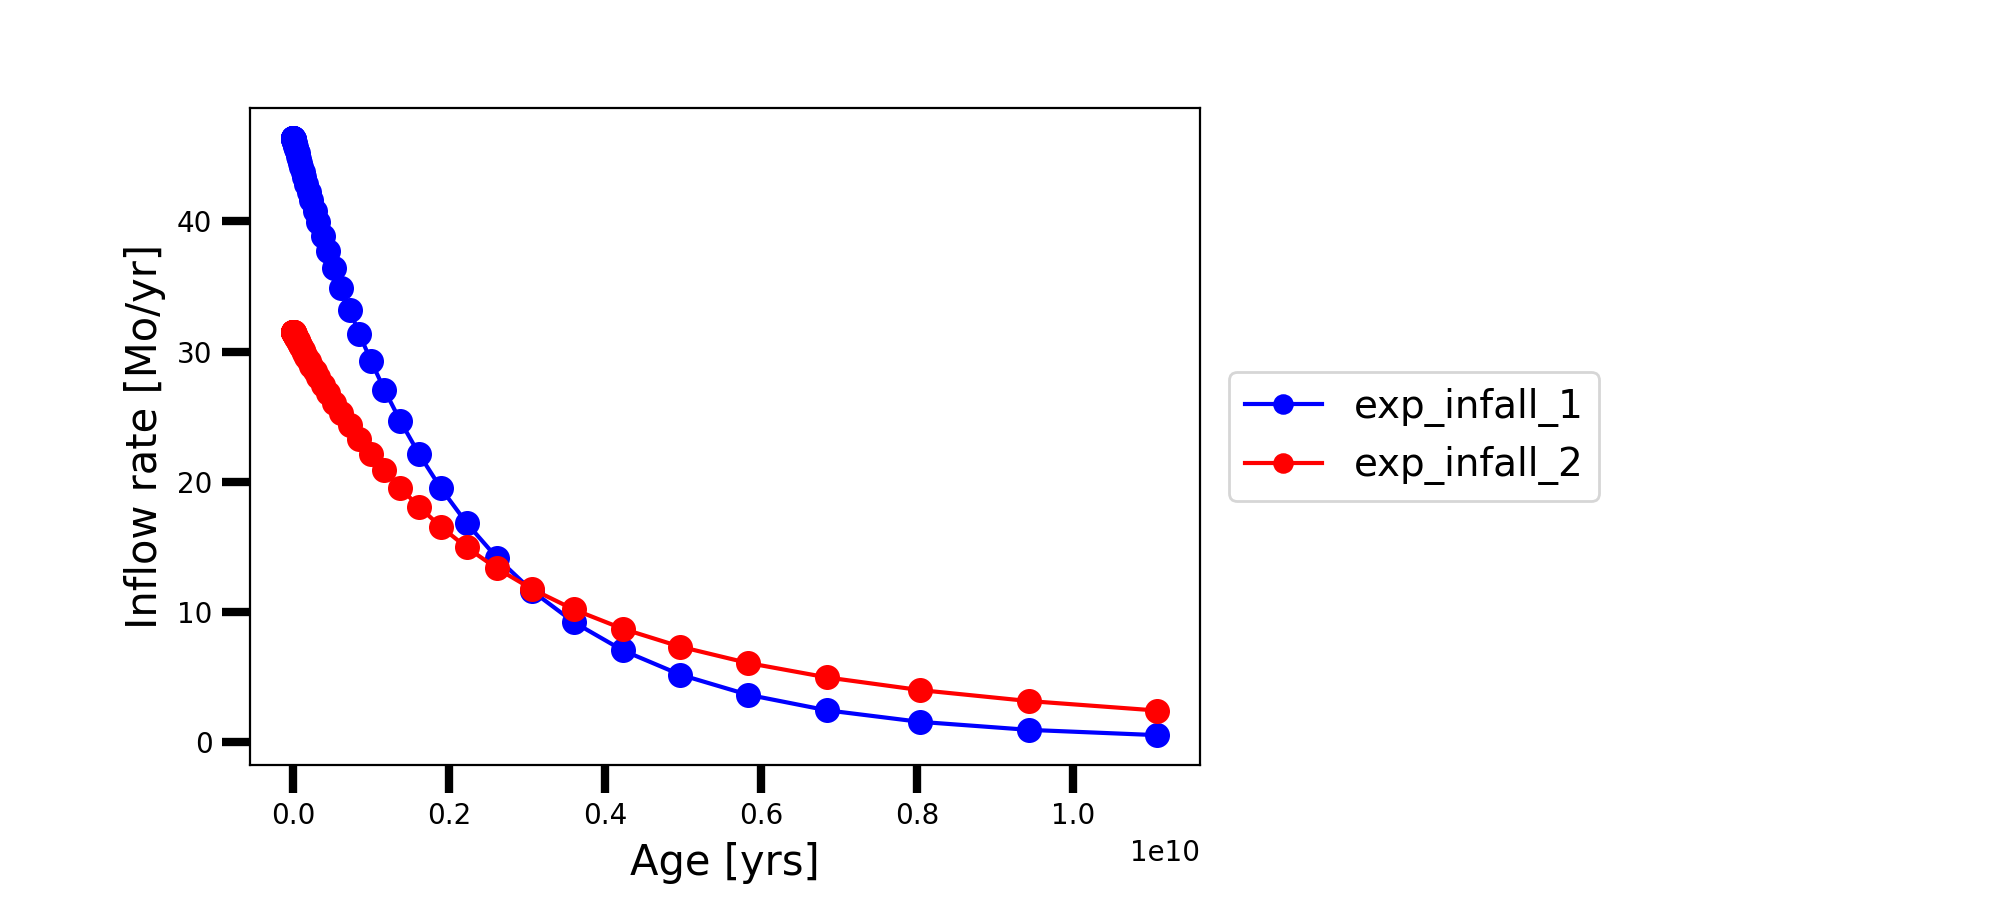

In [4]:
# Plot the galactic inflow rate
%matplotlib nbagg
op_exp_1.inner.plot_inflow_rate(color='b', label='exp_infall_1')
op_exp_2.inner.plot_inflow_rate(color='r', label='exp_infall_2')

<IPython.core.display.Javascript object>


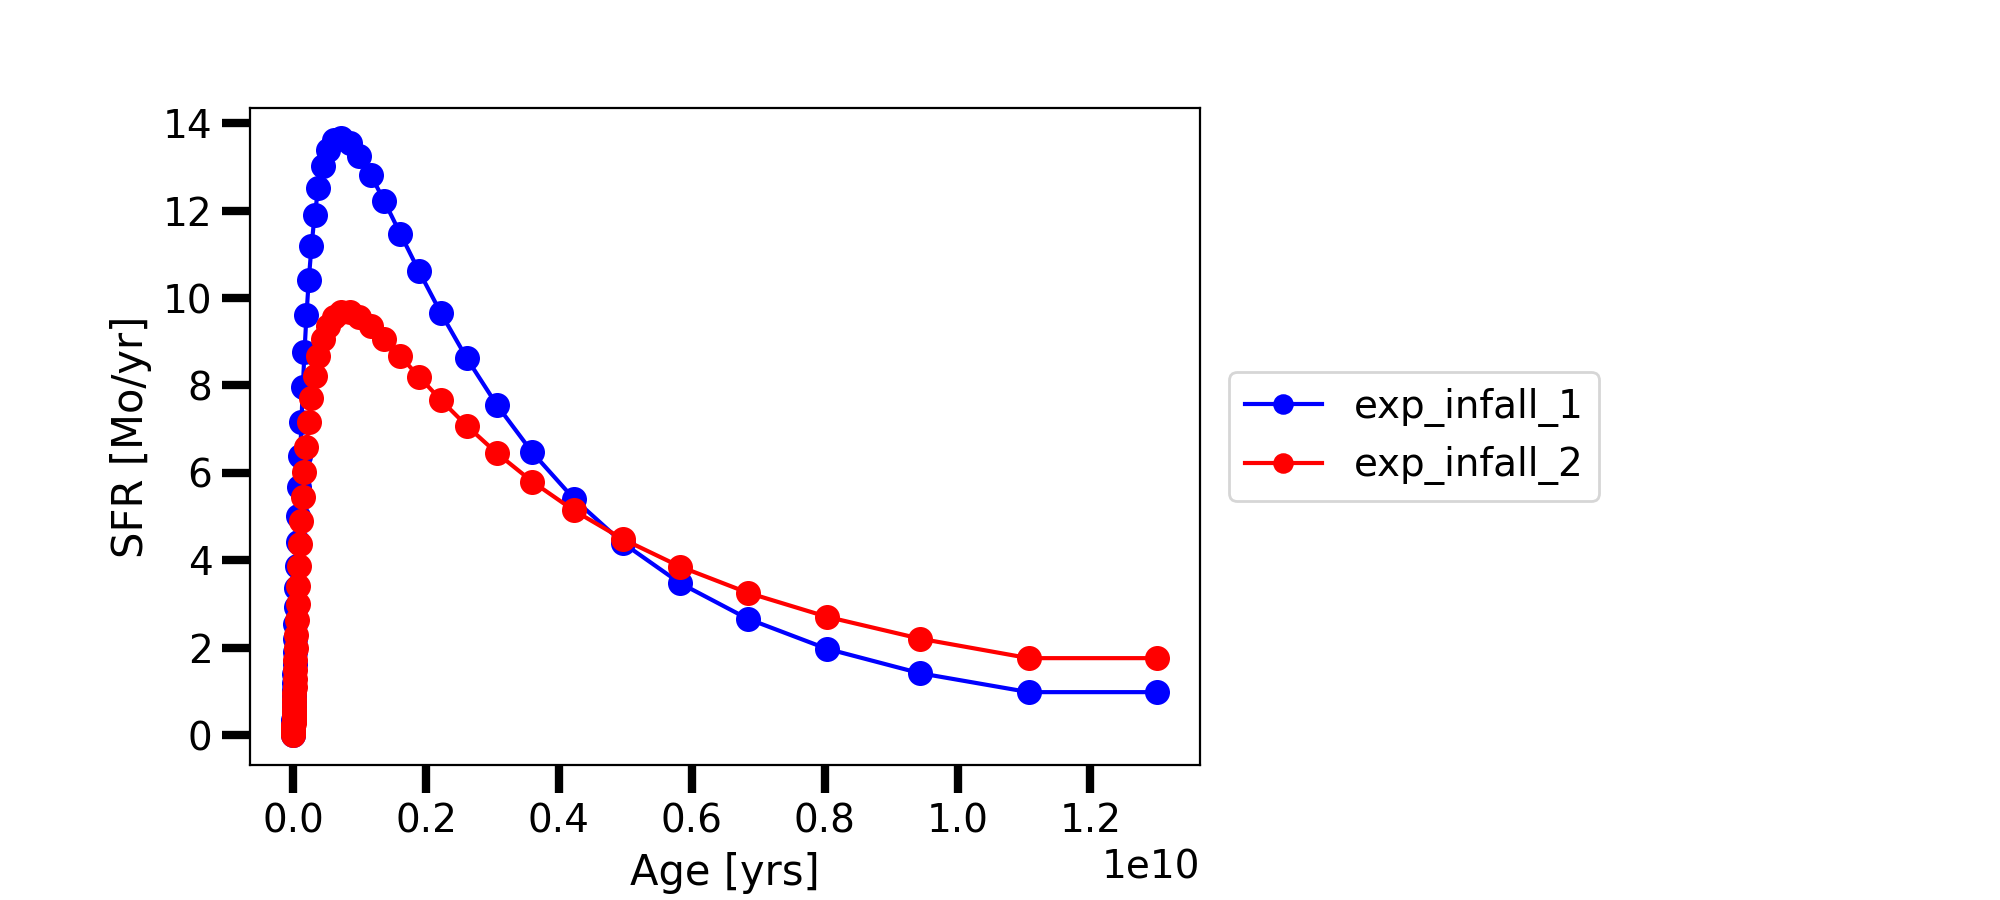

In [5]:
# Plot the star formation rate
%matplotlib nbagg
op_exp_1.inner.plot_star_formation_rate(color='b', label='exp_infall_1')
op_exp_2.inner.plot_star_formation_rate(color='r', label='exp_infall_2')

<IPython.core.display.Javascript object>


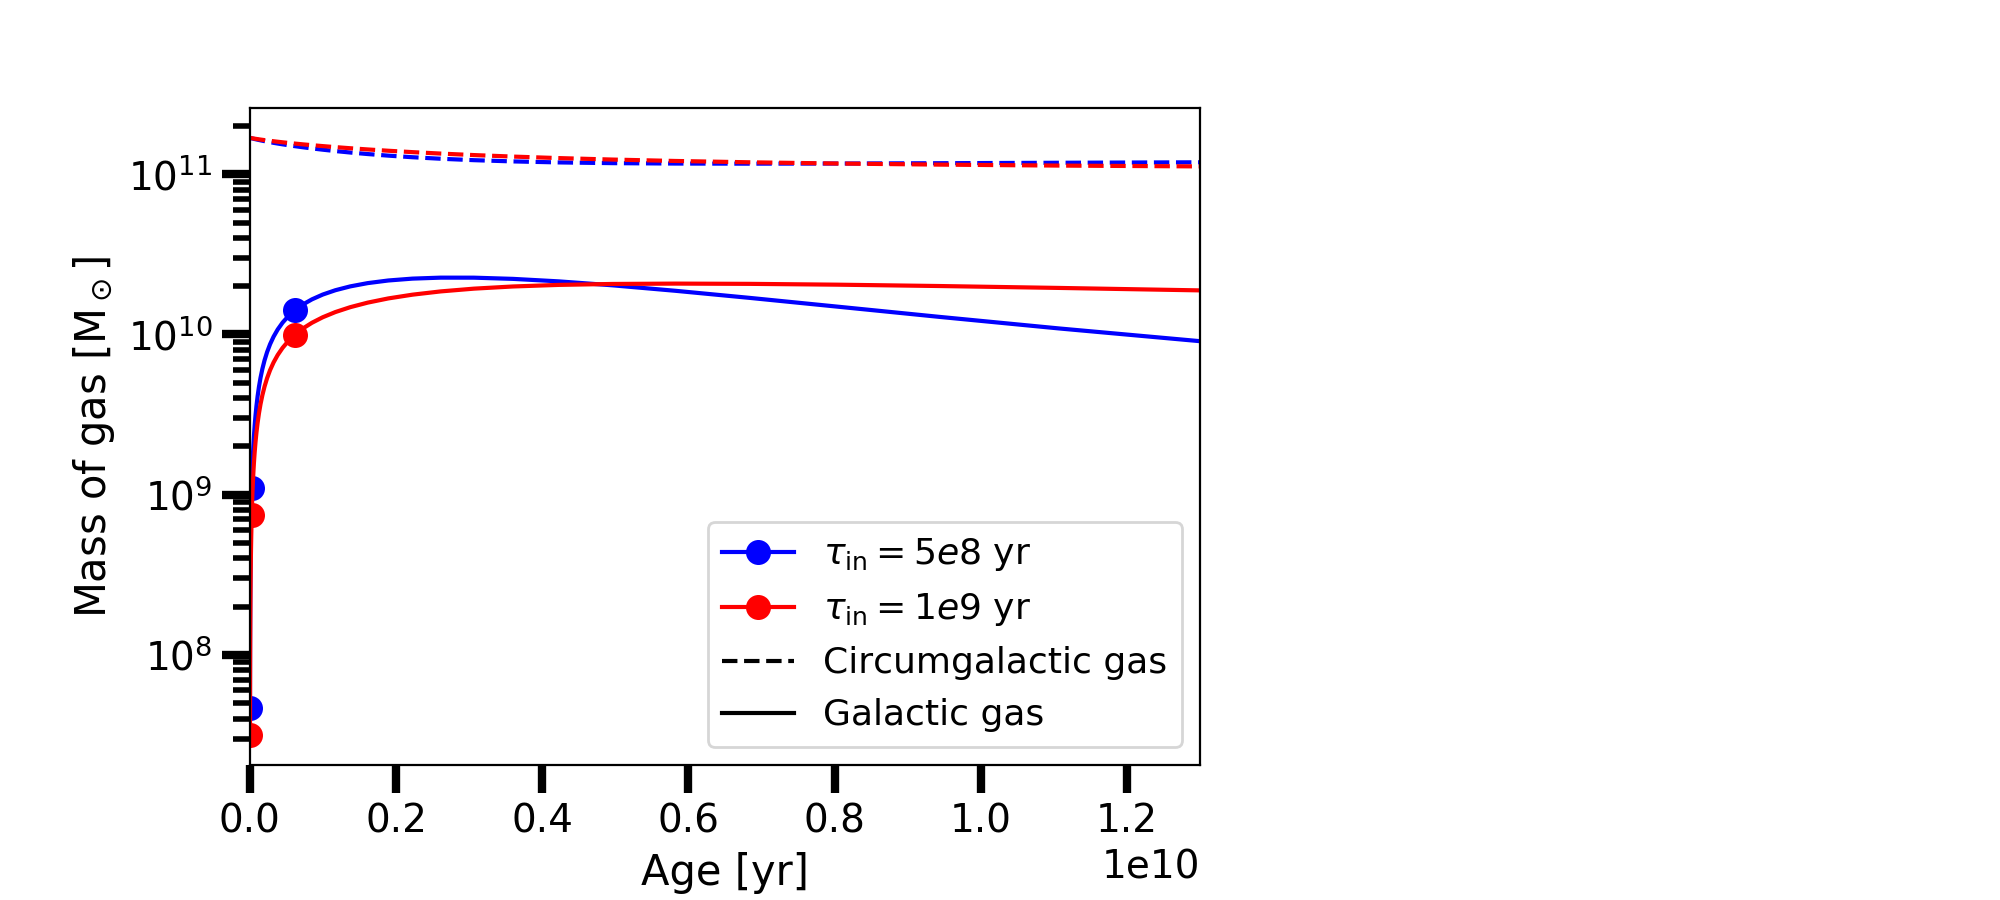

Text(0.5,0,'Age [yr]')

In [6]:
# Get the total mass of the CGM at each timestep
m_CGM_exp_1 = get_CGM_mass(op_exp_1)
m_CGM_exp_2 = get_CGM_mass(op_exp_2)

# Plot the mass of the CGM and galactic gas
%matplotlib nbagg
op_exp_1.inner.plot_totmasses(color='b', label=r'$\tau_\mathrm{in}=5e8$ yr')
op_exp_2.inner.plot_totmasses(color='r', label=r'$\tau_\mathrm{in}=1e9$ yr')
plt.plot(op_exp_1.inner.history.age, m_CGM_exp_1, '--b')
plt.plot(op_exp_2.inner.history.age, m_CGM_exp_2, '--r')
plt.xscale('linear')

# Add extra legend
plt.plot([],[],'--k', label='Circumgalactic gas')
plt.plot([],[],'-k',  label='Galactic gas')
plt.legend(fontsize=13, loc=4)

# Adjust x-y-axis label
plt.ylabel('Mass of gas [M$_\odot$]')
plt.xlabel('Age [yr]')

## Star Formation Efficiency

The star formation rate in OMEGA+ is defined by,

$$\dot{M}_\star = \frac{f_\star}{\tau_\star}\left(M_\mathrm{gas}-M_\mathrm{thresh}\right),$$

where $f_\star$ and $\tau_\star$ are the star formation efficiency and timescale, respectively.  $M_\mathrm{thresh}$ is a threshold gas mass below which star formation is not allowed.

In [7]:
# Run an OMEGA+ model with two different star formation efficiencies
op_sfe_0_05 = omega_plus.omega_plus(exp_infall=exp_infall_2, sfe=0.05)
op_sfe_0_01 = omega_plus.omega_plus(exp_infall=exp_infall_2, sfe=0.01)

OMEGA+ run in progress..
OMEGA run in progress..
   OMEGA run completed - Run time: 3.85s
   OMEGA+ run completed - Run time: 3.85s
OMEGA+ run in progress..
OMEGA run in progress..
   OMEGA run completed - Run time: 3.85s
   OMEGA+ run completed - Run time: 3.85s


<IPython.core.display.Javascript object>


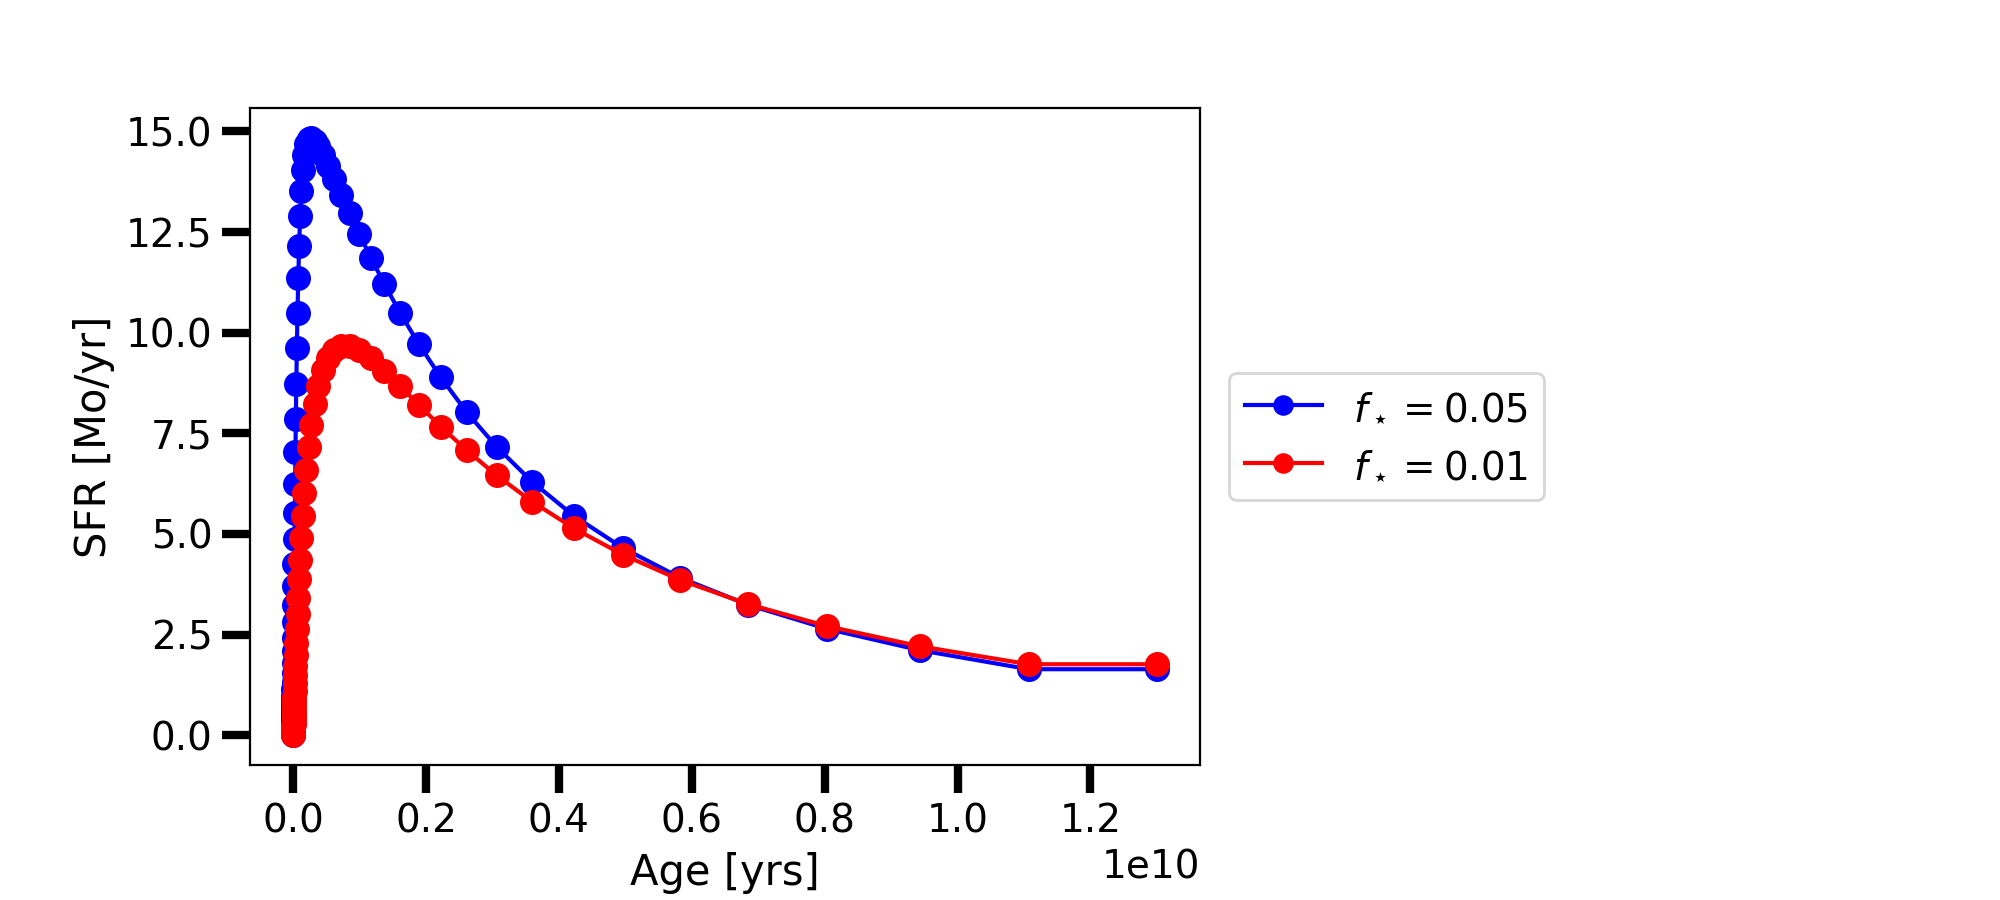

In [8]:
# Plot the star formation rate
%matplotlib nbagg
op_sfe_0_05.inner.plot_star_formation_rate(color='b', label='$f_\star=0.05$')
op_sfe_0_01.inner.plot_star_formation_rate(color='r', label='$f_\star=0.01$')

<IPython.core.display.Javascript object>


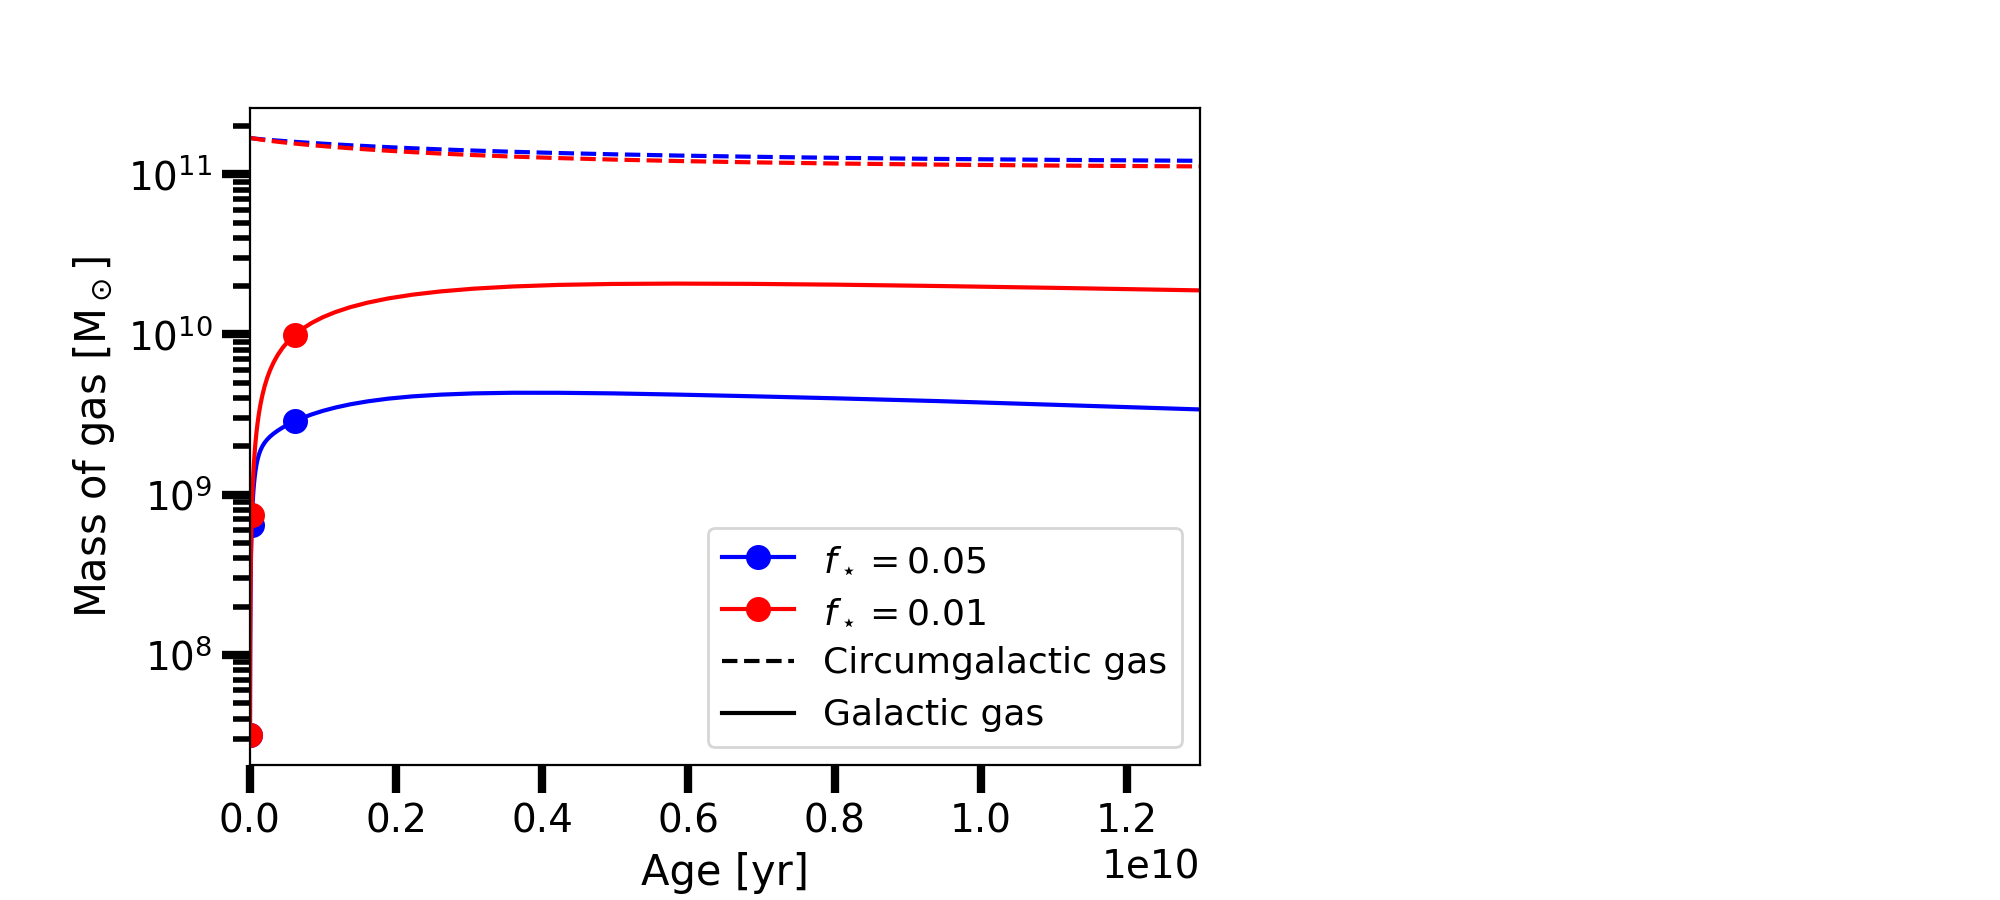

Text(0.5,0,'Age [yr]')

In [9]:
# Calculate the total mass of the CGM at each timestep
m_CGM_sfe_0_05 = get_CGM_mass(op_sfe_0_05)
m_CGM_sfe_0_01 = get_CGM_mass(op_sfe_0_01)

# Plot the mass of the CGM and galactic gas
%matplotlib nbagg
op_sfe_0_05.inner.plot_totmasses(color='b', label='$f_\star=0.05$')
op_sfe_0_01.inner.plot_totmasses(color='r', label='$f_\star=0.01$')
plt.plot(op_sfe_0_05.inner.history.age, m_CGM_sfe_0_05, '--b')
plt.plot(op_sfe_0_01.inner.history.age, m_CGM_sfe_0_01, '--r')
plt.xscale('linear')

# Add extra legend
plt.plot([],[],'--k', label='Circumgalactic gas')
plt.plot([],[],'-k',  label='Galactic gas')
plt.legend(fontsize=13, loc=4)

# Adjust x-y-axis label
plt.ylabel('Mass of gas [M$_\odot$]')
plt.xlabel('Age [yr]')

## 3. Galactic Outflows

The galactic outflow rate $\dot{M}_\mathrm{out}$ is tied to the star formation rate $\dot{M}_\star$ of the galaxy via the mass-loading factor $\eta$ (e.g., <a href="http://adsabs.harvard.edu/abs/2005ApJ...618..569M">Murray et al. 2005</a>).

$$ \eta \equiv \frac{\dot{M}_\mathrm{out}}{\dot{M}_\star} $$

More information and more options can be found in the  <a href="https://github.com/becot85/JINAPyCEE/blob/master/DOC/OMEGA%2B_defining_gas_outflow_galactic.ipynb">Defining gas outflow (galactic)</a> notebook.

In [10]:
# Run an OMEGA+ model with two different strength for galactic outflows
op_eta_0_5 = omega_plus.omega_plus(exp_infall=exp_infall_2, mass_loading=0.5)
op_eta_5_0 = omega_plus.omega_plus(exp_infall=exp_infall_2, mass_loading=5.0)

OMEGA+ run in progress..
OMEGA run in progress..
   OMEGA run completed - Run time: 4.04s
   OMEGA+ run completed - Run time: 4.05s
OMEGA+ run in progress..
OMEGA run in progress..
   OMEGA run completed - Run time: 3.92s
   OMEGA+ run completed - Run time: 3.92s


<IPython.core.display.Javascript object>


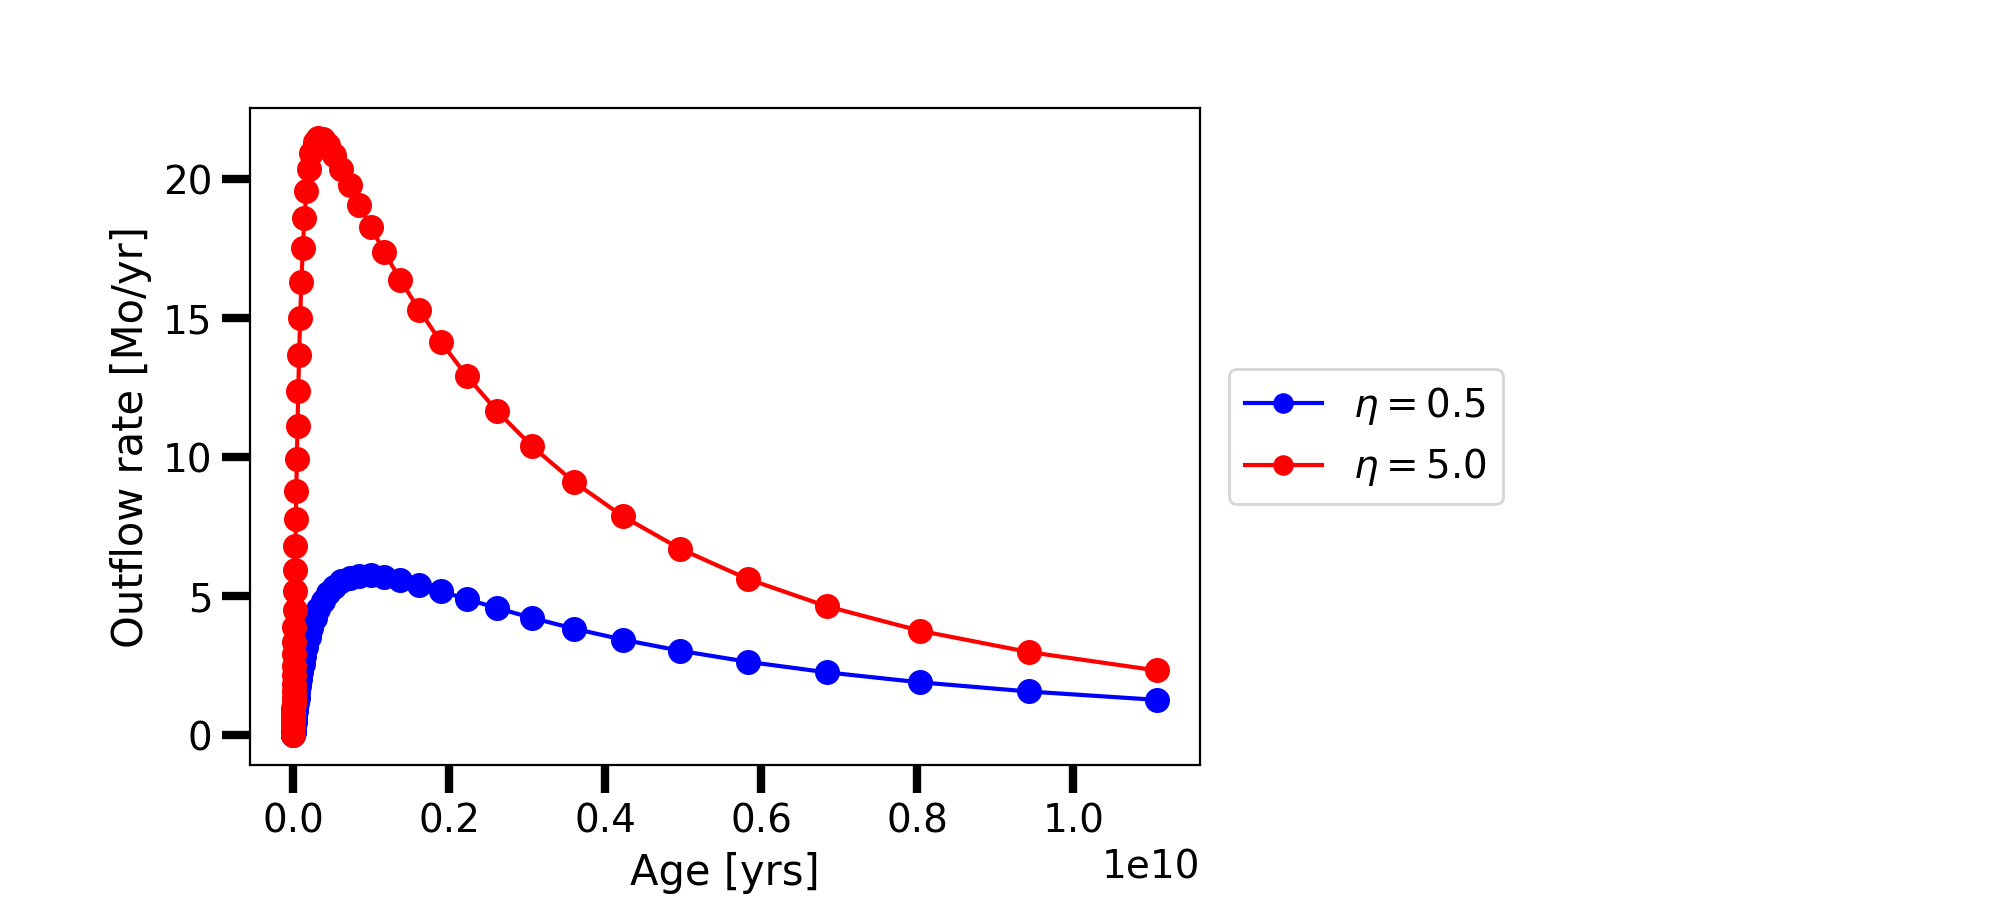

In [13]:
# Plot the galactic outflow rate
%matplotlib nbagg
op_eta_0_5.inner.plot_outflow_rate(color='b', label='$\eta=0.5$')
op_eta_5_0.inner.plot_outflow_rate(color='r', label='$\eta=5.0$')

<IPython.core.display.Javascript object>


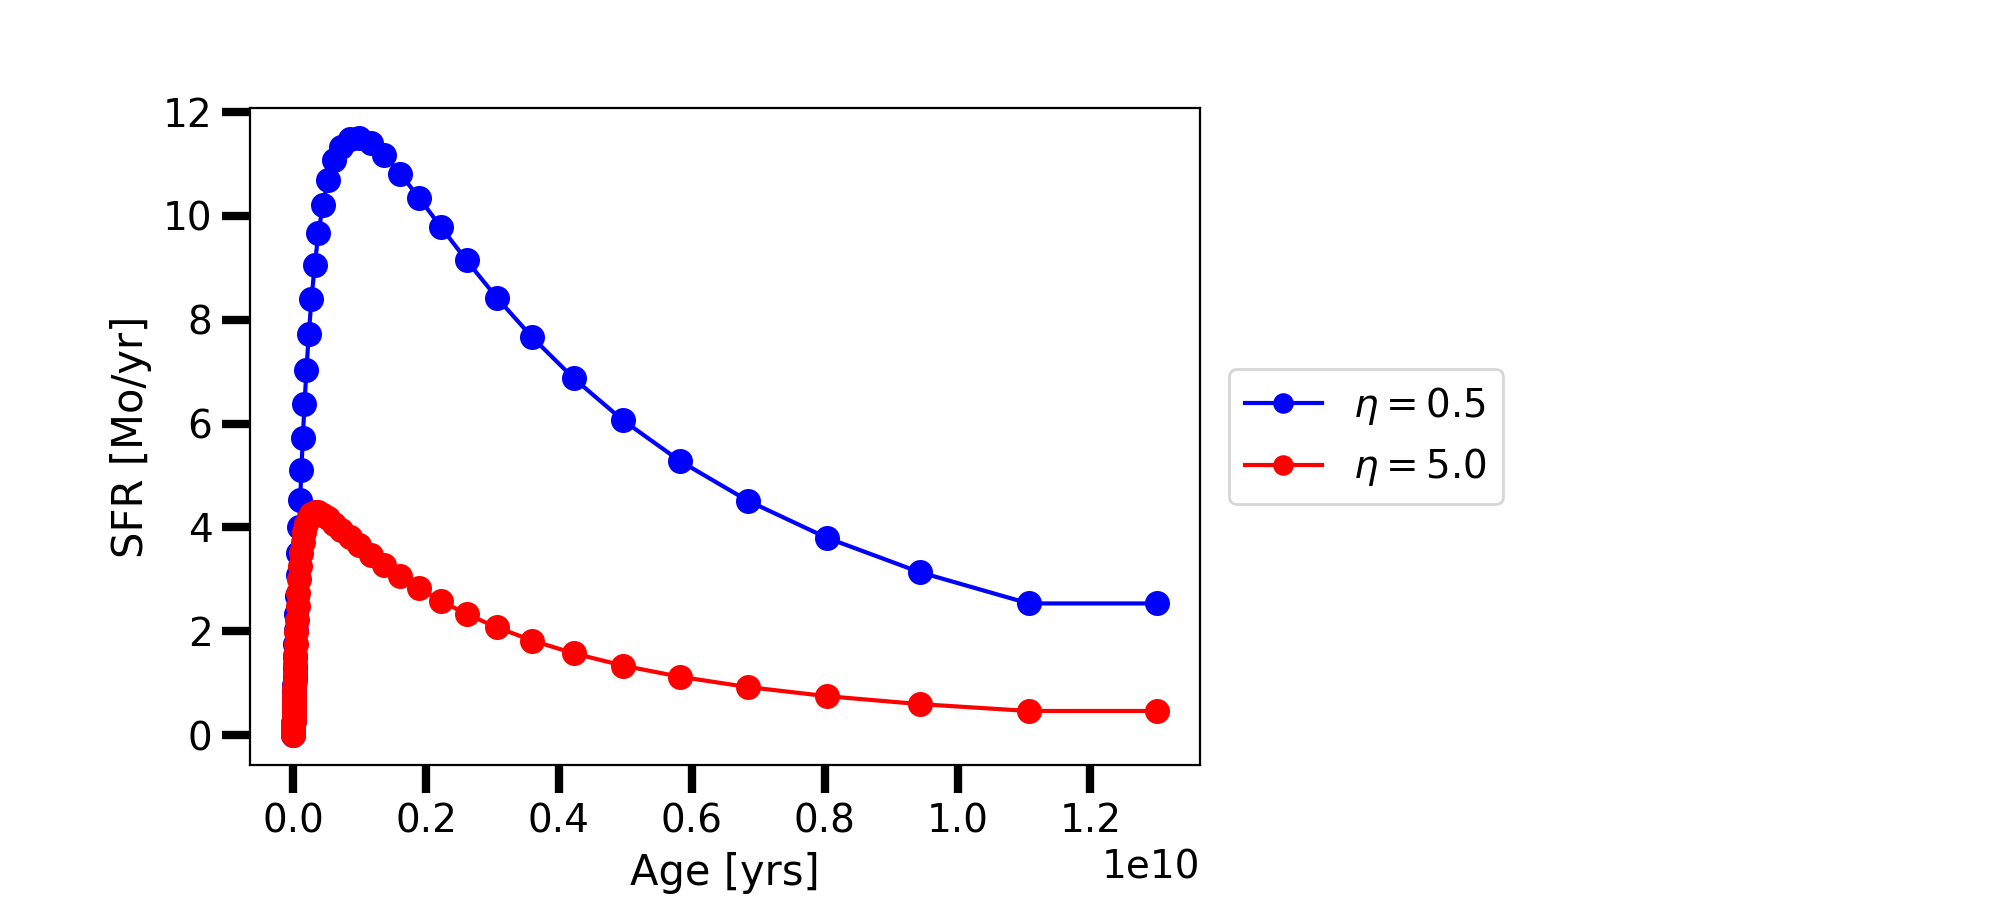

In [11]:
# Plot the star formation rate
%matplotlib nbagg
op_eta_0_5.inner.plot_star_formation_rate(color='b', label='$\eta=0.5$')
op_eta_5_0.inner.plot_star_formation_rate(color='r', label='$\eta=5.0$')

<IPython.core.display.Javascript object>


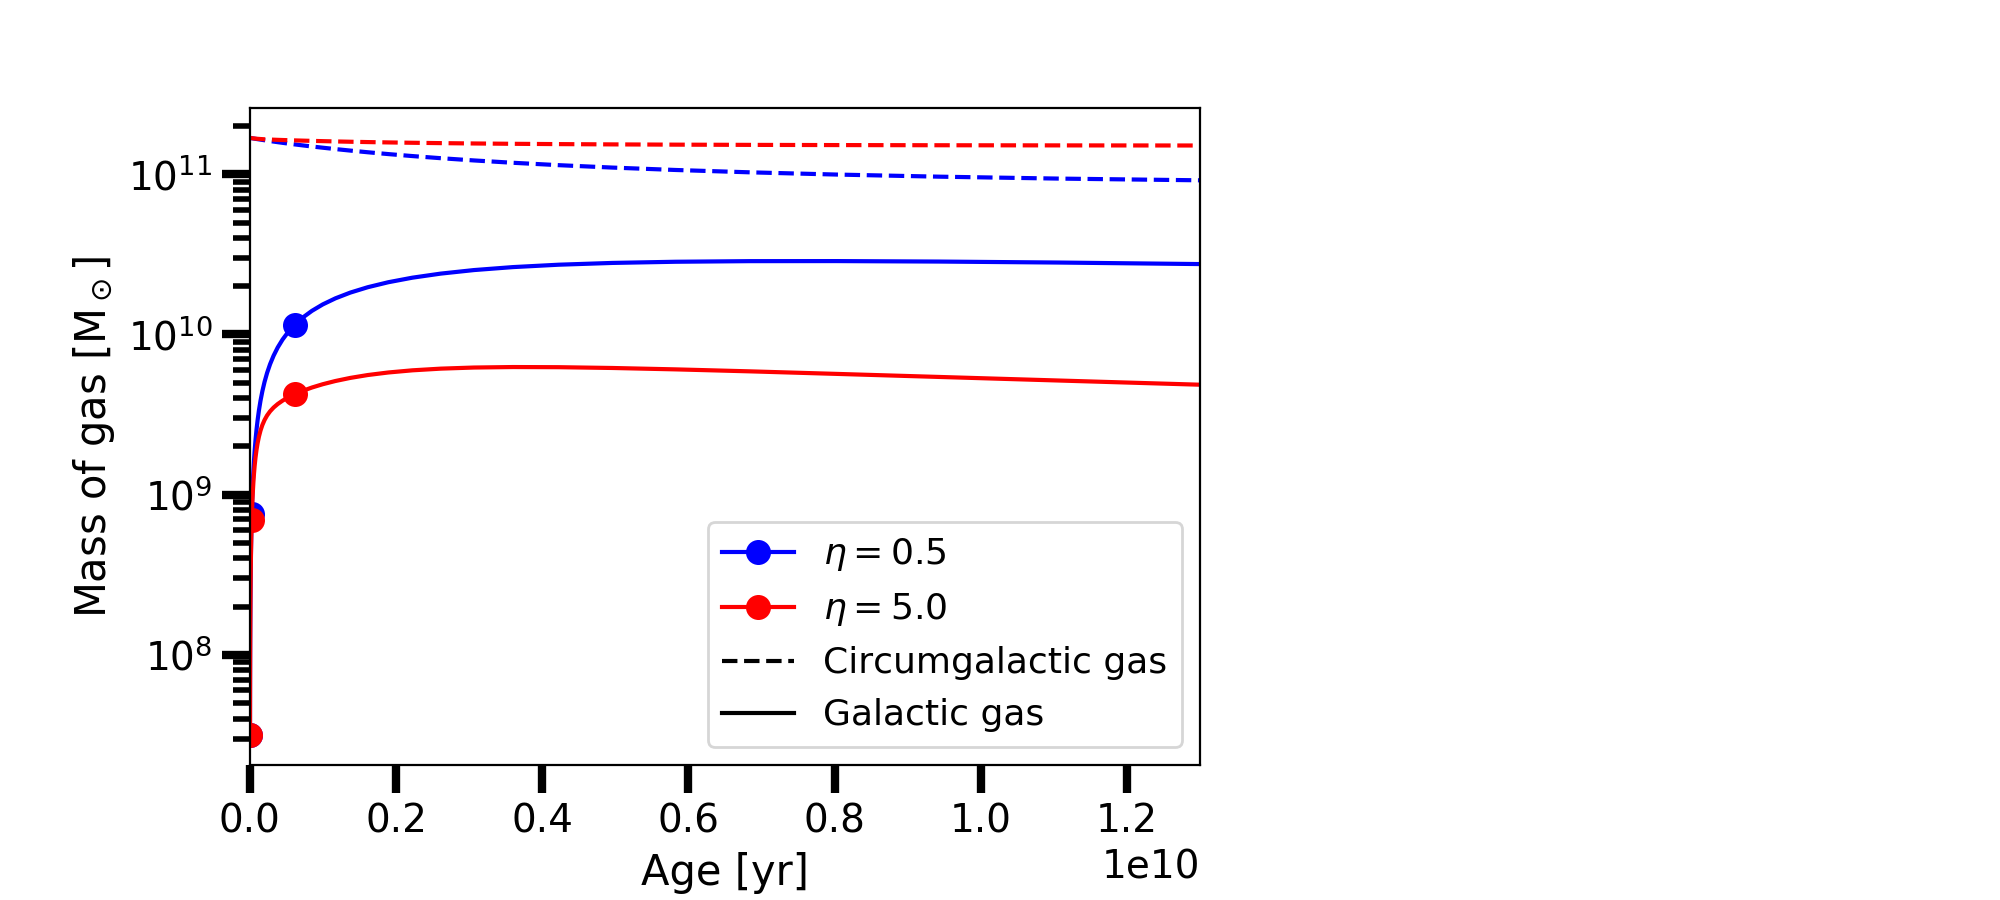

Text(0.5,0,'Age [yr]')

In [14]:
# Calculate the total mass of the CGM at each timestep
m_CGM_eta_0_5 = get_CGM_mass(op_eta_0_5)
m_CGM_eta_5_0 = get_CGM_mass(op_eta_5_0)

# Plot the mass of the CGM and galactic gas
%matplotlib nbagg
op_eta_0_5.inner.plot_totmasses(color='b', label='$\eta=0.5$')
op_eta_5_0.inner.plot_totmasses(color='r', label='$\eta=5.0$')
plt.plot(op_eta_0_5.inner.history.age, m_CGM_eta_0_5, '--b')
plt.plot(op_eta_5_0.inner.history.age, m_CGM_eta_5_0, '--r')
plt.xscale('linear')

# Add extra legend
plt.plot([],[],'--k', label='Circumgalactic gas')
plt.plot([],[],'-k',  label='Galactic gas')
plt.legend(fontsize=13, loc=4)

# Adjust x-y-axis label
plt.ylabel('Mass of gas [M$_\odot$]')
plt.xlabel('Age [yr]')